.# FINAL PROJECT
# Telco Customer Churn Analysis
Dataset is from kagle https://www.kaggle.com/datasets/blastchar/telco-customer-churn

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
3. Demographic info about customers – gender, age range, and if they have partners and dependents

# I. Import Library

In [1]:
 # Packages analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Packages for Feature Engineering and Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
# Preprocessing modules
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.base import TransformerMixin

# Packages for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from silhoutte import silhoutte_analysis

#For Evaluating Model
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

# Packages for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay

import joblib

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# II. Import Dataset

In [2]:
# Loading data

df = pd.read_csv('https://raw.githubusercontent.com/hilmanhibabullah/RevoU-Assigment/main/telco_churn.csv')
pd.set_option('display.max.columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# III. Cleaning Data

In [3]:
# see info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There's 21 columns. 
dominate by type object column, and 2 interger64 and 1 float data type

## Check all info data

In [4]:
# check duplicate data

print("duplicate data : ", df.duplicated().sum())

duplicate data :  0


there isn't any duplicate data in this dataset

In [5]:
# Create function for check missing value, unique value, datatype
def clean (data):
    
    # Find dataset types.
    dataset_info = data.dtypes.reset_index()
    dataset_info = dataset_info.rename(columns={'index': 'column_name',0:'type'})
    # Find dataset total uniques.
    uniques= data.nunique().reset_index()
    uniques = uniques.rename(columns = {0:'unique'})
    dataset_info['unique'] = uniques['unique']
    # Find dataset misisng values.
    data = data.replace(' ', np.nan)
    data = data.replace('', np.nan)
    missing = data.isnull().sum()/data.shape[0]*100
    missing = missing.reset_index().rename(columns = {0:'missing'})
    dataset_info['missing %'] = missing['missing']
    # Find the amount off missing
    null = data.isnull().sum()
    null = null.reset_index().rename(columns = {0:'null'})
    dataset_info['null'] = null['null'] 
    print(dataset_info)

In [6]:
# missing values on all data
clean(df)

         column_name     type  unique  missing %  null
0         customerID   object    7043   0.000000     0
1             gender   object       2   0.000000     0
2      SeniorCitizen    int64       2   0.000000     0
3            Partner   object       2   0.000000     0
4         Dependents   object       2   0.000000     0
5             tenure    int64      73   0.000000     0
6       PhoneService   object       2   0.000000     0
7      MultipleLines   object       3   0.000000     0
8    InternetService   object       3   0.000000     0
9     OnlineSecurity   object       3   0.000000     0
10      OnlineBackup   object       3   0.000000     0
11  DeviceProtection   object       3   0.000000     0
12       TechSupport   object       3   0.000000     0
13       StreamingTV   object       3   0.000000     0
14   StreamingMovies   object       3   0.000000     0
15          Contract   object       3   0.000000     0
16  PaperlessBilling   object       2   0.000000     0
17     Pay

there's a strange data in TotalCharge column, because it's conatin a amount TotalCharge and its numeric but this column is objet data type, it must be interger64 or float64. so we must change it. And see the missing value in TotalCharge 0,15% data. 

## Delete Missing Value

In [7]:
df.isin([" ",""]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There's 11 data missing in TotalCharge, and we decide to delete the data and change the data type object to float64

In [8]:
# Delete missing value in TotalCharge

delete_rows_empty = df[df['TotalCharges'] == ' '].index

df = df.drop(delete_rows_empty, axis=0)

## Change Data Type

In [9]:
# Change data type TotalCharge

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [10]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Check Unique Each Columns

In [11]:
# Check unique values
for i in df.select_dtypes('object').columns:
    print(f"{i}: {df[i].unique()}")
    print('')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



We noticed that the class for "No phone serivice" and "No internet service" means "No", hence to avoid redundancy class in every column with these class, I will just replace it all with "No".

Let's Check

In [12]:
# Change the unique value
data_list = [df]
for i, col in enumerate(data_list):
    data_list[i].replace({"No phone service": "No"}, inplace=True)
    data_list[i].replace({"No internet service": "No"},inplace=True)

In [13]:
# Check unique values
for col in df.select_dtypes('object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
# make a new column

def customer_types(x):
  if x <= 5 :
    return 'new customer'
  elif x <= 12:
    return 'prospect customer'
  elif x <= 24:
    return 'reguler customer'
  else :
     return 'loyal customer'


df['customer_types'] = df['tenure'].apply(customer_types)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,new customer


In [15]:
df.customer_types.value_counts()

loyal customer       3833
new customer         1360
reguler customer     1024
prospect customer     815
Name: customer_types, dtype: int64

In [18]:
# make a copy of data cleaning

df_clean = df.copy()
df_clean

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,new customer


In [19]:
df_clean.tenure.max()

72

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# IV. EDA for Telco Churn

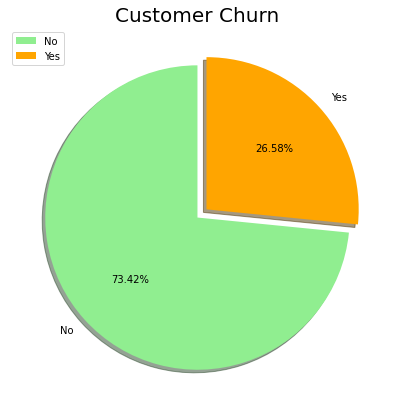

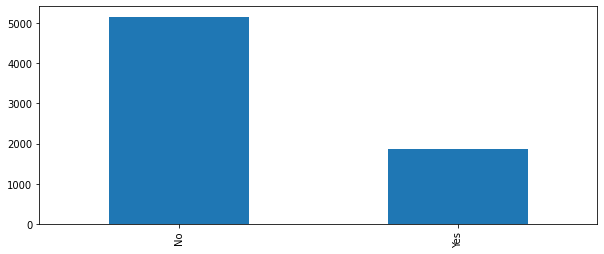

In [21]:
# Melihat komposisi target

labels = ['No', 'Yes']
size = df_clean['Churn'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.08]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Customer Churn', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

fig, axs = plt.subplots( figsize=(10,4))
df_clean['Churn'].value_counts().plot(kind='bar')

We can say that this dataset is classified as imbalanced dataset since the ratio between class on target column is quite far. It is 73.4 % instances classified as No on churn and remaining is Yes class which is only 26.6 %.

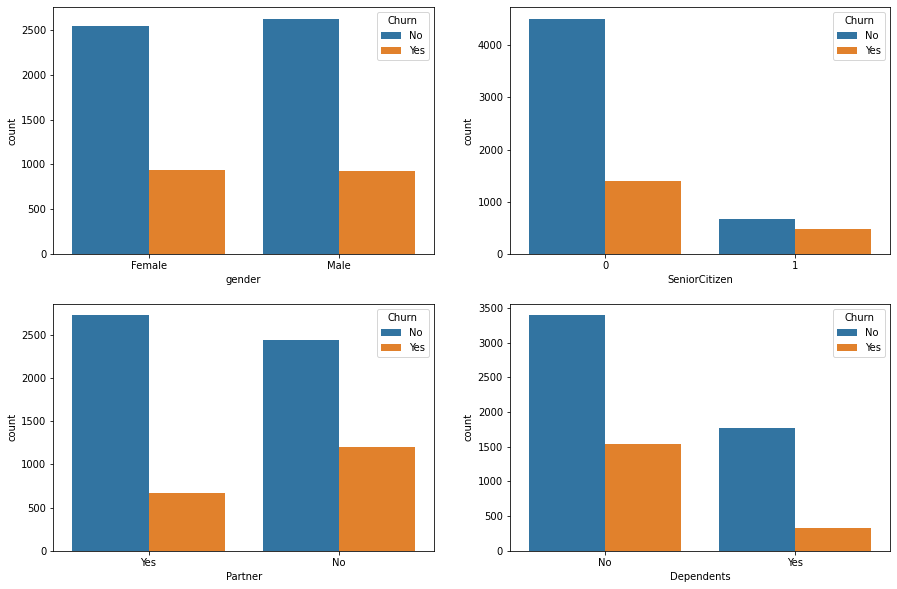

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

sns.countplot(data=df_clean, x='gender', hue='Churn', ax=axs[0,0])
sns.countplot(data=df_clean, x="SeniorCitizen", hue="Churn", ax=axs[0,1])
sns.countplot(data=df_clean, x="Partner", hue="Churn", ax=axs[1,0])
sns.countplot(data=df_clean, x="Dependents", hue="Churn", ax=axs[1,1])
plt.show()

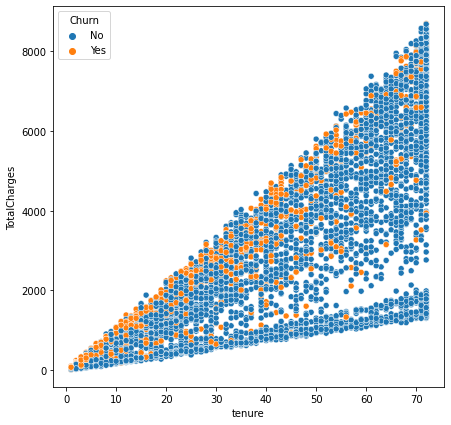

In [23]:

# Correlation between Tenure and TotalCharges
sns.scatterplot(data= df_clean, y='TotalCharges', x='tenure', hue='Churn');

- Tenure and TotalCharges have the positive correlation.
- Most likely, the customer with small tenure and total chargers aswell have high chances to churn which means that the customers whose just recently joined and surely still have few amount of TotalCharges tends to leave or end their subscription.

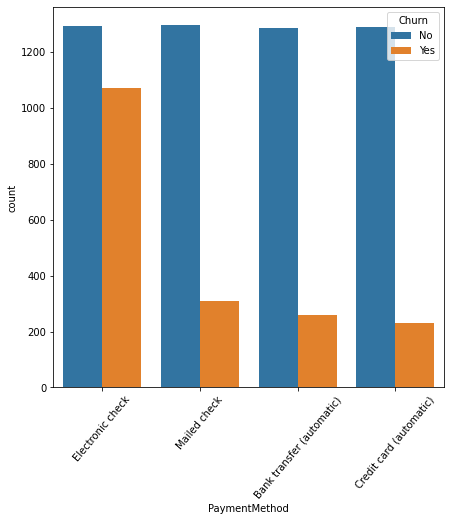

In [144]:
# Correlation between PaymentMethod and Churn
sns.countplot(data = df_clean, x='PaymentMethod', hue='Churn');
plt.xticks(rotation = 50)
plt.show()

According to customer payment method, those whose using electronic check for payment many times churned from product compare to those using traditional method or even credit card user.

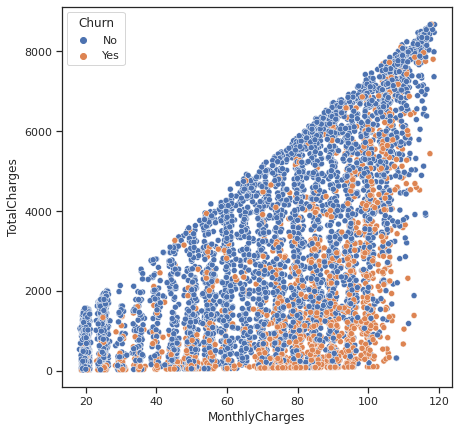

In [151]:
# Correlation between MonthlyCharges and TotalCharges
sns.scatterplot(data = df_clean, x='MonthlyCharges', y='TotalCharges', hue='Churn');

Most of the customer with high monthly amount of charges choosed to stop being customer of this company.

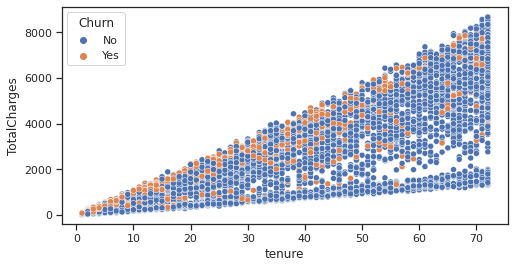

In [153]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df_clean['tenure'], df_clean['TotalCharges'], hue= df_clean['Churn'])
plt.show()

the highest tenure customer choose, the more high total charges

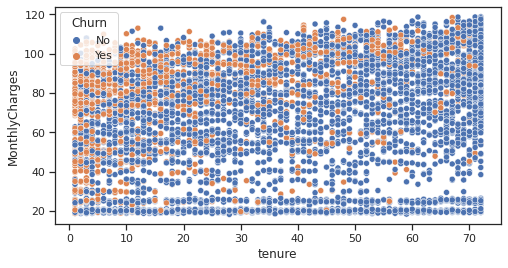

In [154]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df_clean['tenure'], df_clean['MonthlyCharges'], hue= df_clean['Churn'])
plt.show()

Interesting in this plot is Customer with a low tenure but the MonthlyCharges is high. this means that there are customer who take all services and that makes monthycharges is high

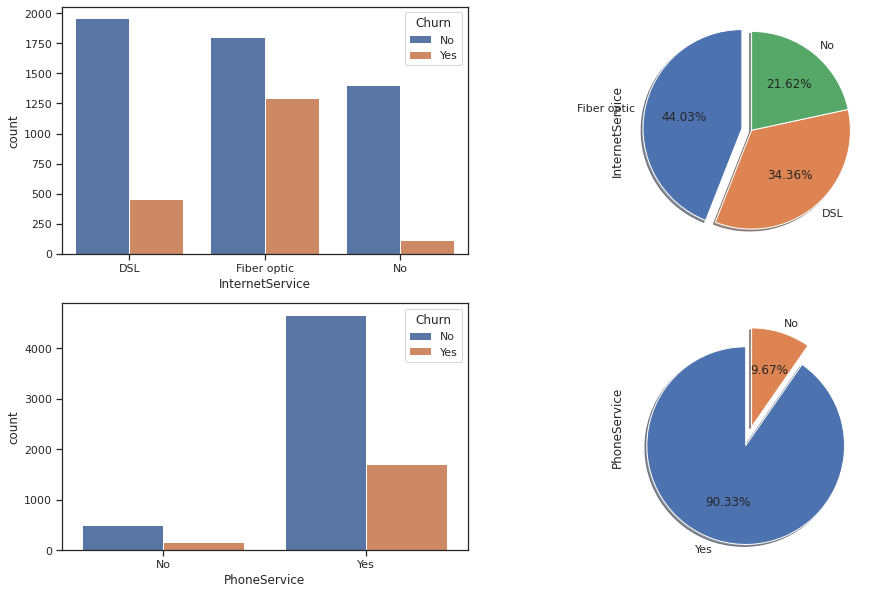

In [172]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))

sns.countplot(df_clean['InternetService'], hue= df_clean['Churn'], ax=ax[0,0])

df_clean['InternetService'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[0,1], explode = [0.1, 0, 0], shadow= True, startangle=90)

sns.countplot(df_clean['PhoneService'], hue= df_clean['Churn'], ax=ax[1,0])

df_clean['PhoneService'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1,1],explode = [0.2, 0], shadow= True, startangle=90)

ax[0, 0].set_xticklabels(['DSL', 'Fiber optic', 'No'], rotation=0)

ax[1, 0].set_xticklabels(['No','Yes'], rotation=0)
plt.show()

the customer is hype to take internet services specially for Fiber Optic. but the Customer churn are high with customer who user fiber optic

In [27]:
# Check the customer without internet service
data = df_clean[(df_clean['InternetService'] == 'No')]
print(f"OnlineSecurity: {data['OnlineSecurity'].unique()}")
print(f"TechSupport: {data['TechSupport'].unique()}")

OnlineSecurity: ['No']
TechSupport: ['No']


- The customer who use Fiber optic as internet service most likely choose to leave the product compare to them that use DSL.
- As we know that Telco is a company that provided home phone and Internet services, however there are still some people that keep subscribes the product even they did not use any internet service or other service like online services and there is no techsupport aswell which means probably they subscribed only for home phone services.

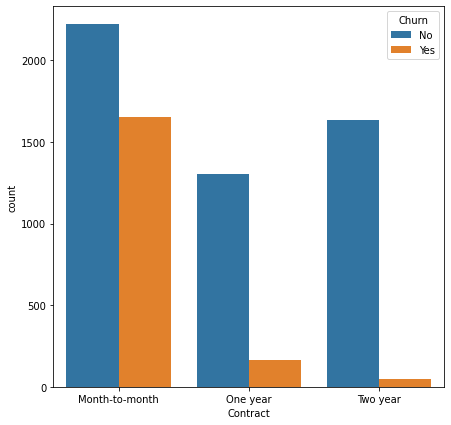

In [28]:

sns.countplot(data=df_clean, x='Contract', hue='Churn');

Customer are high use Month to Month Contract, but in a same way customer churn is high with customer with Month to Month Contract

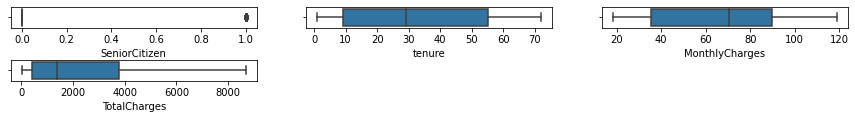

In [30]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=1.5)
for i, col_num in enumerate(df_clean.select_dtypes('number')):
    ax = plt.subplot(16,3,i+1)
    sns.boxplot(x=df_clean[col_num])

there's no outliers in this data

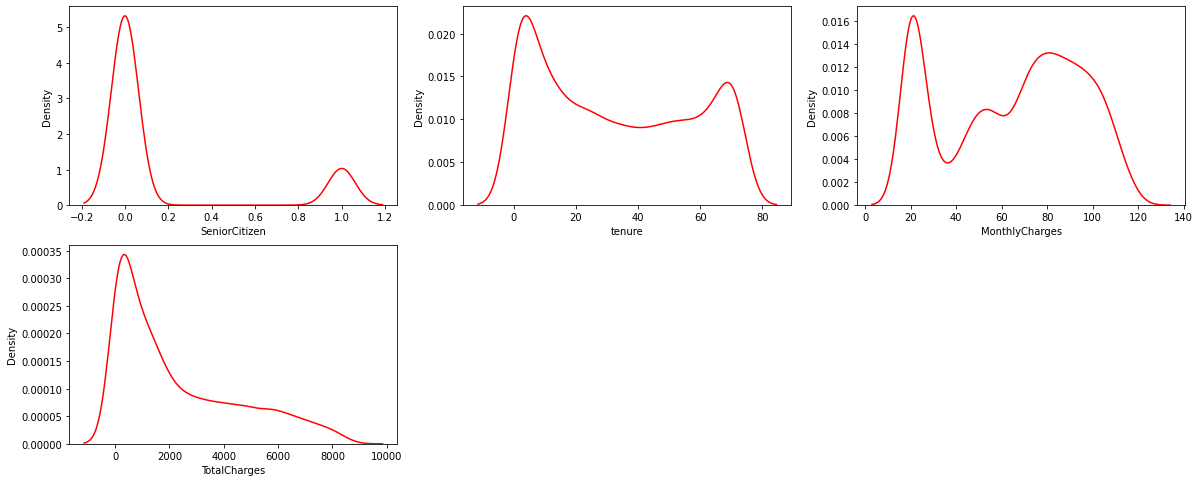

==========  Skewness  ==========

SeniorCitizen : 1.8311025436022044

tenure : 0.23773083190513133

MonthlyCharges : -0.22210292770166232

TotalCharges : 0.9616424997242504



In [31]:
# Distribusi Data

plt.figure(figsize=(20,30))
for i, col_num in enumerate(df_clean.select_dtypes("number")):
    ax = plt.subplot(7, 3, i+1)
    sns.kdeplot(x=df_clean[col_num], color="r")
plt.show()

# Melihat skew tiap distribusi
print('================================')
print('==========  Skewness  ==========')
print('')

for col in df_clean.select_dtypes(['number']).columns:
    print(col,':' ,(df_clean[col].skew()))
    print("")

In [32]:
df_clean.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [33]:
df_clean.to_csv('clean_telco.csv', index=False)

# V. Business Problem

1. Option for tenure that customer pick
- Tenure and TotalCharges have the positive correlation.
- Most likely, the customer with small tenure and total chargers aswell have high chances to churn which means that the customers whose just
recently joined and surely still have few amount of TotalCharges tends to leave or end their subscription.

2. Amount of charges will be one of reasoin to churn
- Most of the customer with high monthly amount of charges choosed to stop being customer of this company.

3. The Internet Service
- The customer who use Fiber optic as internet service most likely choose to leave the product compare to them that use DSL.
As we know that Telco is a company that provided home phone and Internet services, however there are still some people that keep 
subscribes the product even they did not use any internet service or other service like online services and there is no techsupport aswell 
which means probably they subscribed only for home phone services.


## Can we make sure the price of the service with look Tenure and monthly charges?

In [35]:
 # make a sample query for check the detail price breakwodn by the services
 # i want to see the price of phone service

phone_service = df_clean[
                 (df_clean['tenure'] == 1 ) &
                 (df_clean['PhoneService'] == 'Yes' ) &
                 (df_clean['MultipleLines'] == 'No' ) &
                 (df_clean['InternetService'] == 'No' ) &
                 (df_clean['OnlineSecurity'] == 'No' ) &
                 (df_clean['OnlineBackup'] == 'No' ) &
                 (df_clean['DeviceProtection'] == 'No' ) &
                 (df_clean['TechSupport'] == 'No' ) &
                 (df_clean['StreamingTV'] == 'No' ) &
                 (df_clean['StreamingMovies'] == 'No' ) &
                 (df_clean['PaperlessBilling'] == 'No' ) &
                 (df_clean['PaymentMethod'] == 'Mailed check')
]
phone_service

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,Yes,new customer
100,6380-ARCEH,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.20,20.20,No,new customer
128,3930-ZGWVE,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.75,19.75,No,new customer
199,3645-DEYGF,Male,0,No,Yes,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.75,20.75,No,new customer
295,8203-XJZRC,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.25,20.25,No,new customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,2676-ISHSF,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.30,20.30,No,new customer
6706,7878-RTCZG,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.90,19.90,No,new customer
6738,3590-TCXTB,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.35,20.35,No,new customer
6774,0970-QXPXW,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.65,19.65,No,new customer


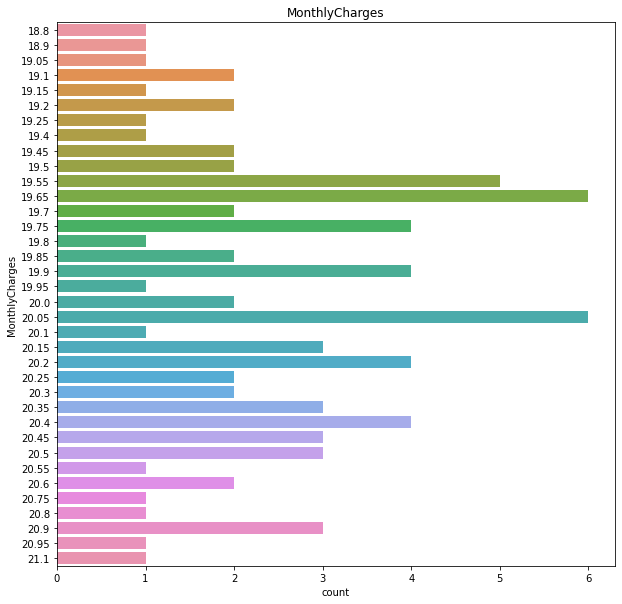

In [36]:
 fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data=phone_service, y='MonthlyCharges')
plt.title('MonthlyCharges')
plt.show()

if we see this countplot, we cant make sure the price of phone services because there some different price, which is not logic. because all variabels are same value but have a different charges

so with this sample i believe that we can not make sure the price of each products. specially for phone service price

Let's check another service which is internet service, can we make sure the price of internet service? let's check

In [37]:
 # make a sample query for check the detail price breakwodn by the services
 # i want to see the price of Internet Service

 
 internet_service = df_clean[
                 (df_clean['tenure'] == 1 ) &
                 (df_clean['PhoneService'] == 'No' ) &
                 (df_clean['MultipleLines'] == 'No' ) &
                 (df_clean['InternetService'] == 'DSL' ) &
                 (df_clean['OnlineSecurity'] == 'No' ) &
                 (df_clean['OnlineBackup'] == 'No' ) &
                 (df_clean['DeviceProtection'] == 'No' ) &
                 (df_clean['TechSupport'] == 'No' ) &
                 (df_clean['StreamingTV'] == 'No' ) &
                 (df_clean['StreamingMovies'] == 'No' ) &
                 (df_clean['PaperlessBilling'] == 'No' ) &
                 (df_clean['PaymentMethod'] == 'Mailed check')
]
internet_service

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types
376,6158-HDPXZ,Male,0,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.35,25.35,No,new customer
2046,2538-OIMXF,Female,0,No,Yes,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.70,24.70,No,new customer
3185,9907-SWKKF,Female,1,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.05,25.05,Yes,new customer
3773,8260-NGFNY,Female,0,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.20,25.20,Yes,new customer
4641,9895-VFOXH,Female,0,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.40,24.40,No,new customer
6149,3069-SSVSN,Female,0,No,No,1,No,No,DSL,No,No,No,No,No,No,One year,No,Mailed check,25.85,25.85,No,new customer
6536,3439-GVUSX,Male,0,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.40,24.40,No,new customer
6979,5351-QESIO,Male,0,No,Yes,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No,new customer


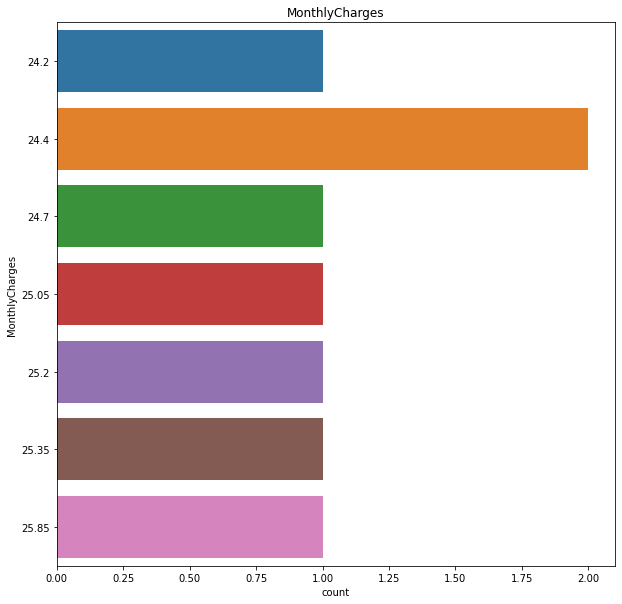

In [38]:
+6
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data=internet_service, y='MonthlyCharges')
plt.title('MonthlyCharges')
plt.show()

as we can see for internet service using DSL have 7 different amount charge. so we can not sure for the price of each service

The conclusion is we cant get the exact price of each services but we can get the mean of each service by query it.

I got the price with quey on Google Big Query, the syntax is on https://console.cloud.google.com/bigquery?sq=445697794163:d8346c7e5b2f4ec2968c513856dd54ac


here's what we found

1. Phone Service;
- min price is 18.25

- max price is 21.45

- mean price is 19.95
2. DSL Internet Service:
-min price 23.45

- max price 26.05

-mean price 24.90

3. Fiber Optic Internet Service:
- min price 47.8

- max price 52.3

- mean price 50.1

4. Multiplelines:
- min price 3.0

- max price 7.0

- mean price 5.01

5. Online Security:
- min price 3.6

- max price 6.15

- mean price 5.04

6. Online Backup:
- min price 3.5

- max price 6.75

- mean price 5.14

7. Device Protection:
- min price 4.2

- max price 5.5

- mean price 4.8

8. Tech Support:
- min price 3.7

- max price 6.3

- mean price 5.04

9. Streaming TV:
- min price 8.5

- max price 11.5

- mean price 10.3

10. Streaming Movies:
- min price 9.0

- max price 11.6

- mean price 10.1

With some conditions;
1. Customer who have PHONESERVICE is can choose to have MULTIPLELINE or not
2. Customer who DONT have PHONESERVICE is definetly dont have MULTIPLELINE
3. Customer who DONT have INTERNETSERVICE(DSL, Fiber Optic) is definetly CAN'T have others service(Online Security, Online Backup, Device Protection, TechSupport, Streaming TV, Streaming Movies)
4. Customer who have Internet Service and choose Fiber Optic is MUST have a PHONE SERVICE

## Let's check the Churn Customer

In [39]:
churn = df_clean[
                 (df_clean['Churn'] == 'Yes')
]

churn = churn.drop(columns = 'customerID')

In [40]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1869 non-null   object 
 1   SeniorCitizen     1869 non-null   int64  
 2   Partner           1869 non-null   object 
 3   Dependents        1869 non-null   object 
 4   tenure            1869 non-null   int64  
 5   PhoneService      1869 non-null   object 
 6   MultipleLines     1869 non-null   object 
 7   InternetService   1869 non-null   object 
 8   OnlineSecurity    1869 non-null   object 
 9   OnlineBackup      1869 non-null   object 
 10  DeviceProtection  1869 non-null   object 
 11  TechSupport       1869 non-null   object 
 12  StreamingTV       1869 non-null   object 
 13  StreamingMovies   1869 non-null   object 
 14  Contract          1869 non-null   object 
 15  PaperlessBilling  1869 non-null   object 
 16  PaymentMethod     1869 non-null   object 


there's 1869 customer churn

In [42]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


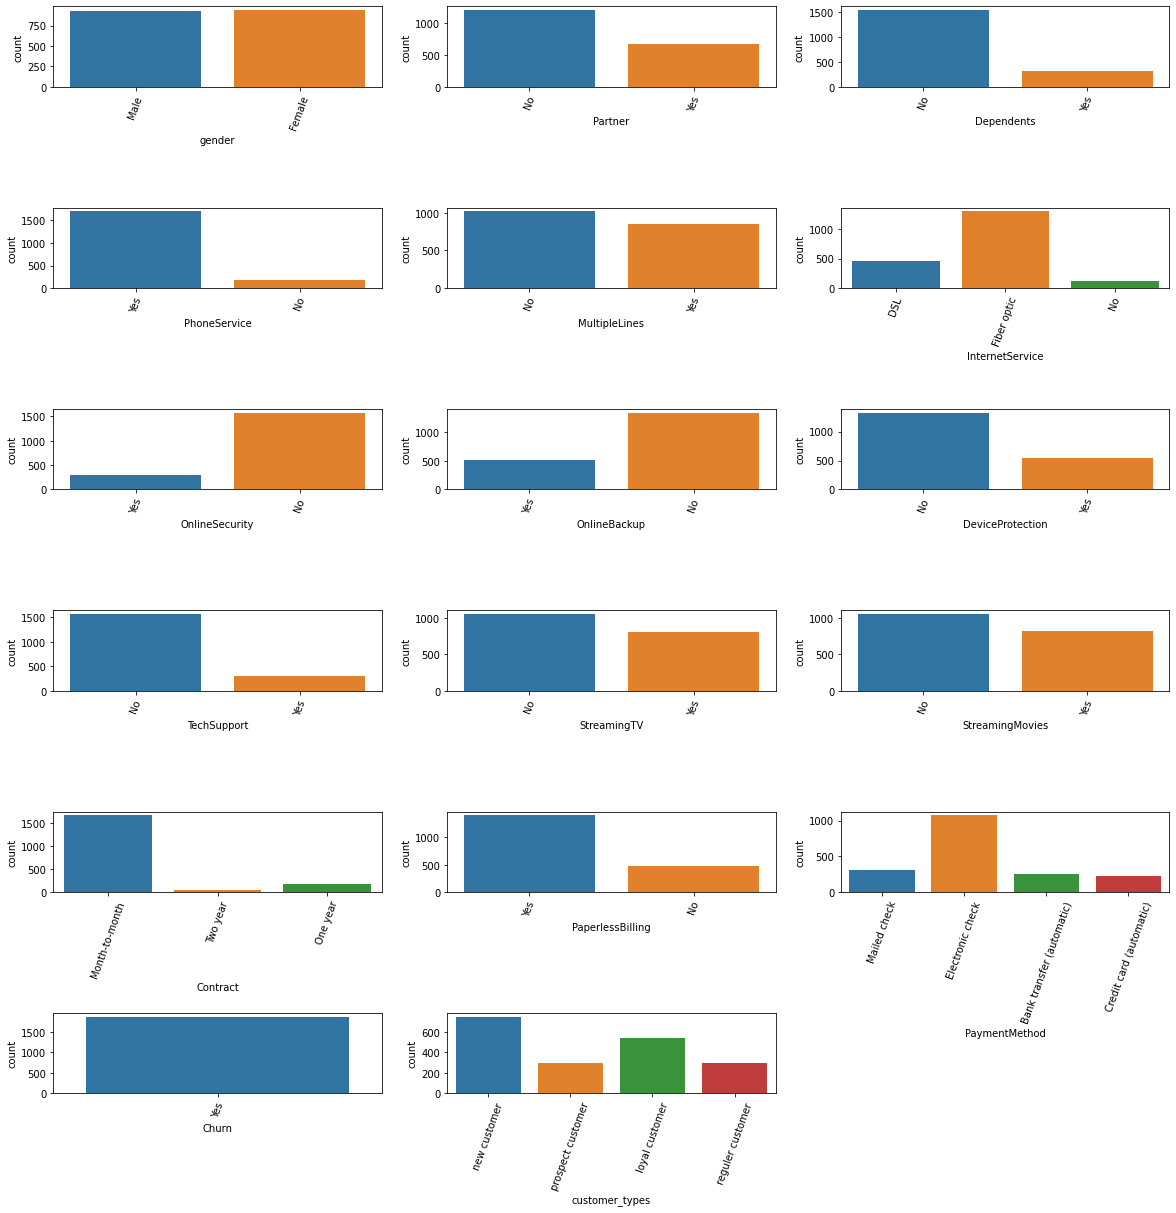

In [43]:
# Display categorical column on countplot
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=1.5)
for i, col in enumerate(churn.select_dtypes('object')):
    ax = plt.subplot(6,3,i+1)
    plt.xticks(rotation = 70)
    sns.countplot(data=churn, x=col)

for the countplot we can see that;
1. Gender ; male or female can be churn for this dataset
2. Partner : customer with no partner is around 1200 churn, customer with partner is only 669 churn
3. Dependent : customer who dont have dependents is tend to be more churn then have dependents
4. Phone Service : 1699 who has phone service is churn, this is strange data
5. Multiple Lines : there customer have multiple line
6. InternetService : Fiber Optic is the hghest interntervice that customer want to churn

In [44]:
for col in churn.select_dtypes('object'):
  print(f'======== {col} =========')
  print(f"{col}: {churn[col].value_counts()}")
  print('=====================')

======== gender =========
gender: Female    939
Male      930
Name: gender, dtype: int64
======== Partner =========
Partner: No     1200
Yes     669
Name: Partner, dtype: int64
======== Dependents =========
Dependents: No     1543
Yes     326
Name: Dependents, dtype: int64
======== PhoneService =========
PhoneService: Yes    1699
No      170
Name: PhoneService, dtype: int64
======== MultipleLines =========
MultipleLines: No     1019
Yes     850
Name: MultipleLines, dtype: int64
======== InternetService =========
InternetService: Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64
======== OnlineSecurity =========
OnlineSecurity: No     1574
Yes     295
Name: OnlineSecurity, dtype: int64
======== OnlineBackup =========
OnlineBackup: No     1346
Yes     523
Name: OnlineBackup, dtype: int64
======== DeviceProtection =========
DeviceProtection: No     1324
Yes     545
Name: DeviceProtection, dtype: int64
======== TechSupport =========
TechSupport

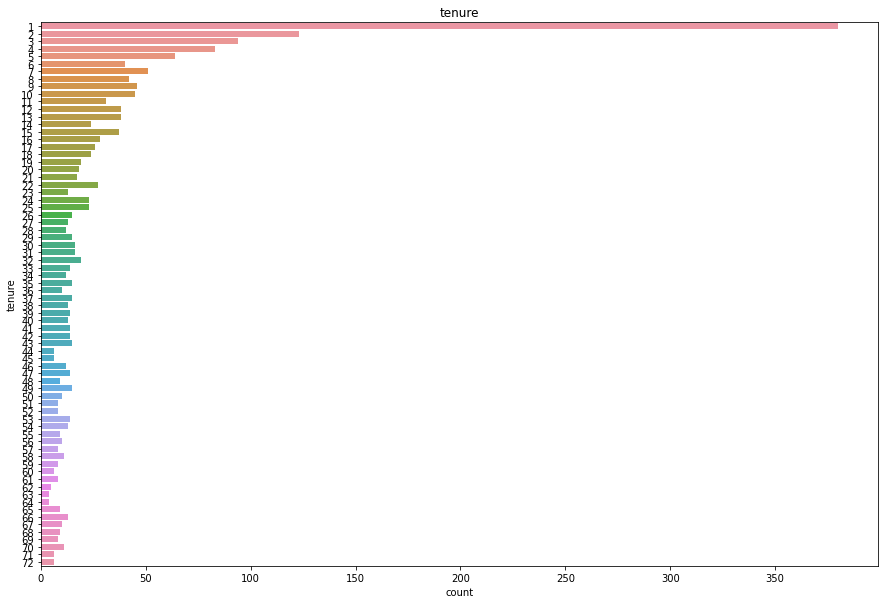

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=churn, y='tenure')
plt.title('tenure')
plt.show()

We can see that the highest tenure customer churn pick is 1, it means that there's many customer is only trying our service and maybe not so satisfied

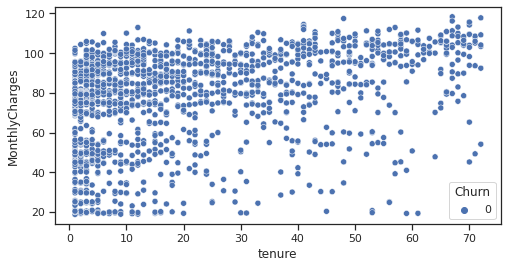

In [176]:
plt.figure(figsize=(8, 4))
sns.scatterplot(churn['tenure'], churn['MonthlyCharges'], hue= churn['Churn'])
plt.show()

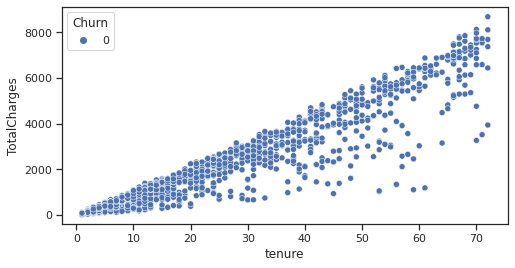

In [175]:
plt.figure(figsize=(8, 4))
sns.scatterplot(churn['tenure'], churn['TotalCharges'], hue= churn['Churn'])
plt.show()

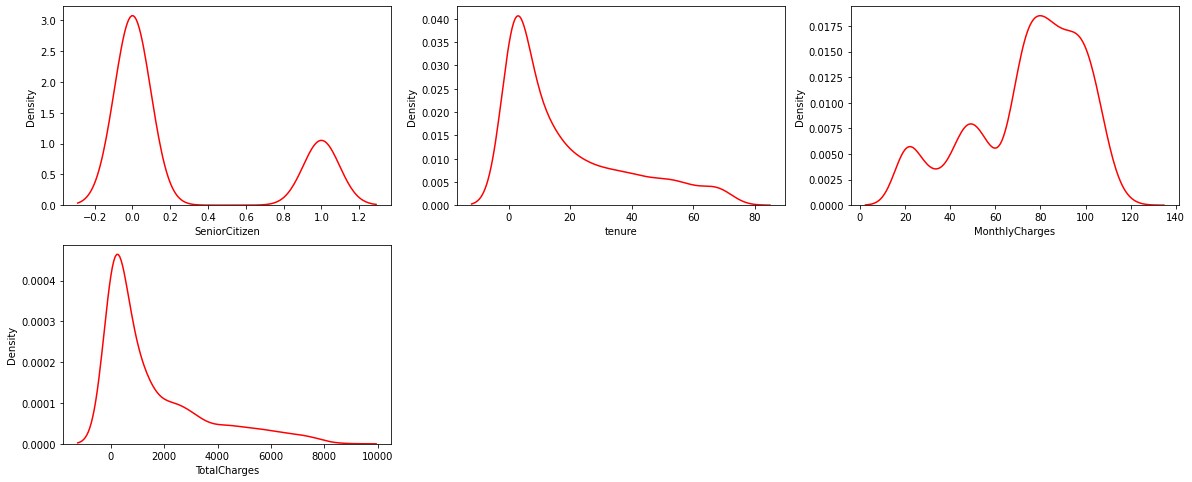

==========  Skewness  ==========

SeniorCitizen : 1.1270393248419939

tenure : 1.1492802882380029

MonthlyCharges : -0.7293738092658485

TotalCharges : 1.5109145987042816



In [46]:
# Distribusi Data

plt.figure(figsize=(20,30))
for i, col_num in enumerate(churn.select_dtypes("number")):
    ax = plt.subplot(7, 3, i+1)
    sns.kdeplot(x=churn[col_num], color="r")
plt.show()

# Melihat skew tiap distribusi
print('================================')
print('==========  Skewness  ==========')
print('')

for col in churn.select_dtypes(['number']).columns:
    print(col,':' ,(churn[col].skew()))
    print("")

In [47]:
churn.tenure.mean()

17.979133226324237

##  Let's check the Customer who not Churn

In [49]:
not_churn = df_clean[
                 (df_clean['Churn'] == 'No')
]

not_churn = not_churn.drop(columns = 'customerID')

In [50]:
not_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5163 non-null   object 
 1   SeniorCitizen     5163 non-null   int64  
 2   Partner           5163 non-null   object 
 3   Dependents        5163 non-null   object 
 4   tenure            5163 non-null   int64  
 5   PhoneService      5163 non-null   object 
 6   MultipleLines     5163 non-null   object 
 7   InternetService   5163 non-null   object 
 8   OnlineSecurity    5163 non-null   object 
 9   OnlineBackup      5163 non-null   object 
 10  DeviceProtection  5163 non-null   object 
 11  TechSupport       5163 non-null   object 
 12  StreamingTV       5163 non-null   object 
 13  StreamingMovies   5163 non-null   object 
 14  Contract          5163 non-null   object 
 15  PaperlessBilling  5163 non-null   object 
 16  PaymentMethod     5163 non-null   object 


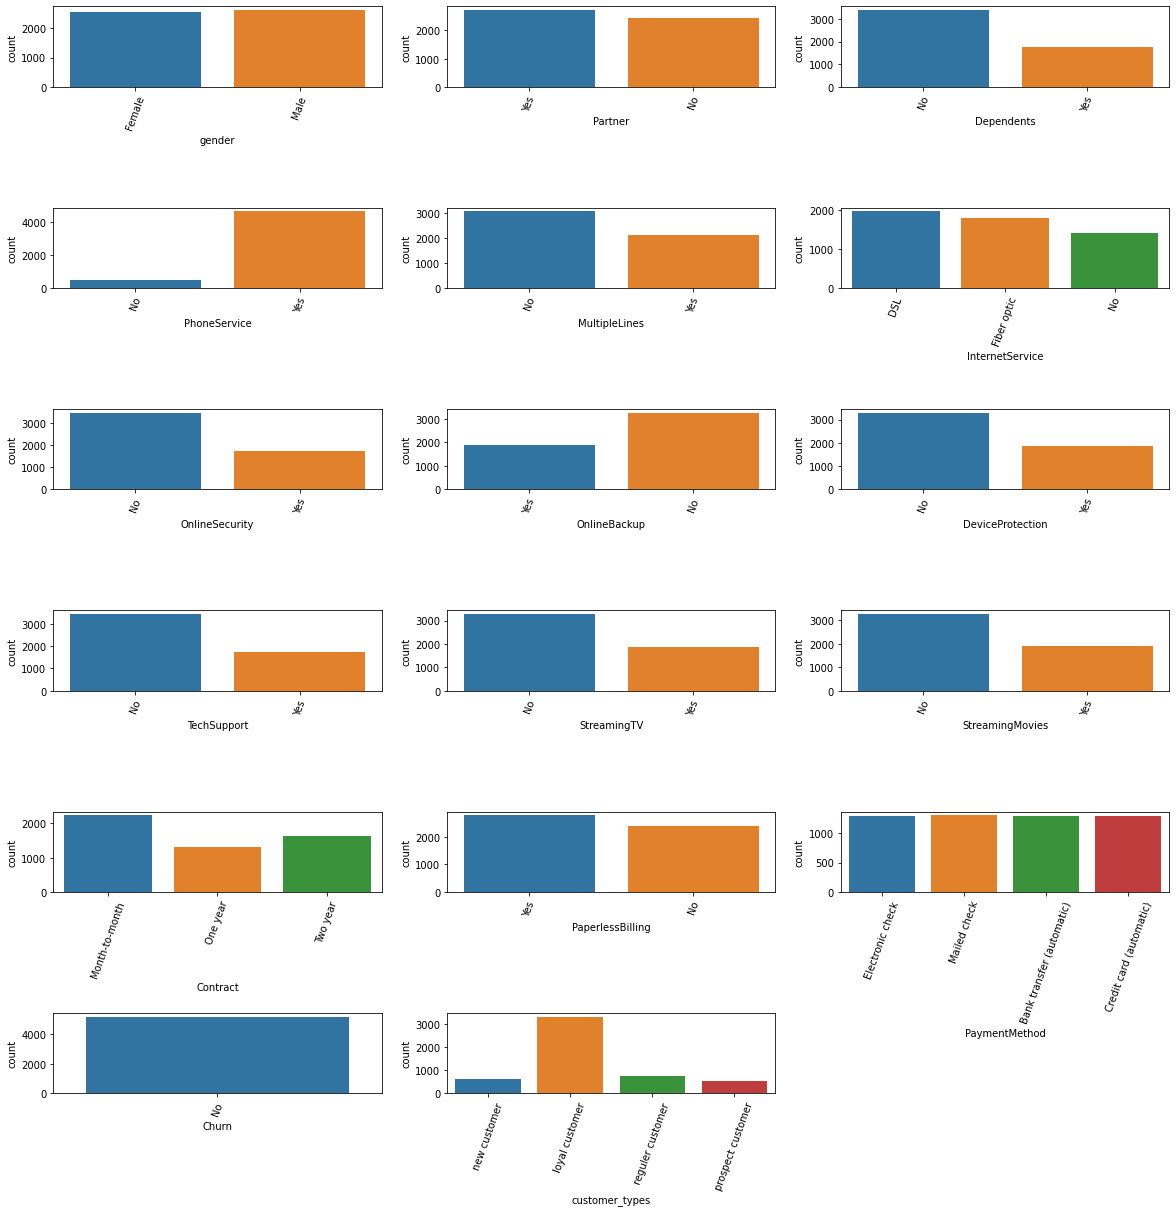

In [52]:
# Display categorical column on countplot
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=1.5)
for i, col in enumerate(not_churn.select_dtypes('object')):
    ax = plt.subplot(6,3,i+1)
    plt.xticks(rotation = 70)
    sns.countplot(data=not_churn, x=col)

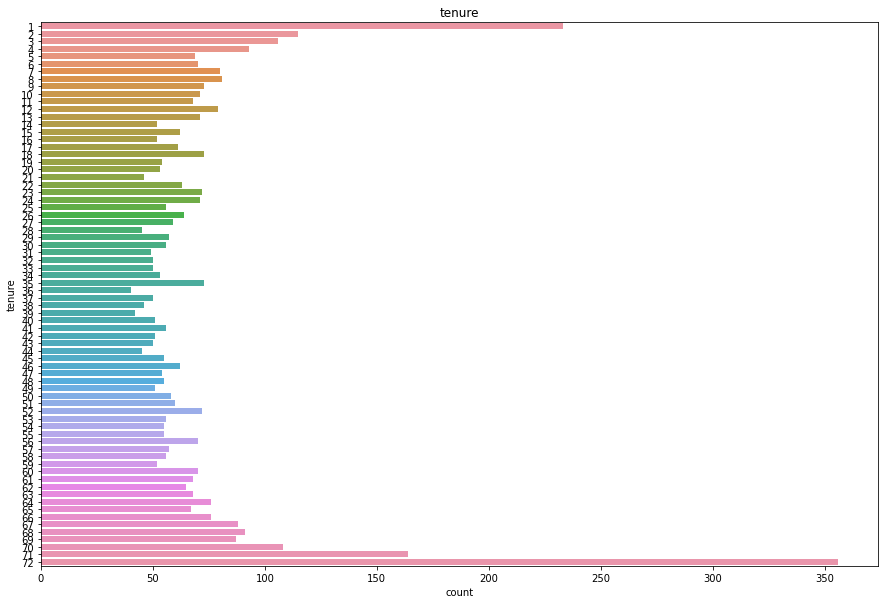

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=not_churn, y='tenure')
plt.title('tenure')
plt.show()

different with churn customer

Customer who not churn have a csutomer with 72 tenure or 6 years with our company, and there's many customer with 1 tenure to

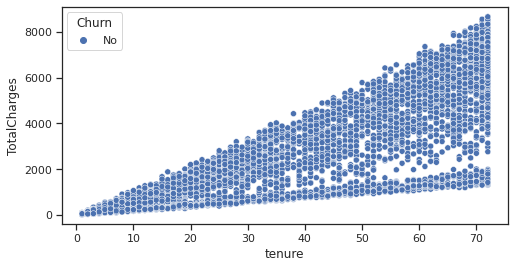

In [173]:
plt.figure(figsize=(8, 4))
sns.scatterplot(not_churn['tenure'], not_churn['TotalCharges'], hue= not_churn['Churn'])
plt.show()

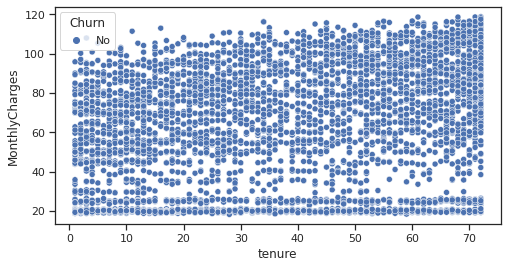

In [174]:
plt.figure(figsize=(8, 4))
sns.scatterplot(not_churn['tenure'], not_churn['MonthlyCharges'], hue= not_churn['Churn'])
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(not_churn['tenure'], not_churn['TotalCharges'], hue= not_churn['Churn'])
plt.show()

# VI. Kmeans Clustering

## VI.1 Prepare Data No Churn Customer

In [54]:
df_cluster = df_clean.copy()
no_churn = df_clean.copy()
churn = df_clean.copy()


In [55]:
no_churn = no_churn[no_churn['Churn'] == 'No']

In [56]:
churn = churn[churn["Churn"] == 'Yes']

In [57]:
cluster_1 = no_churn.copy()

## No Churn Dataset

In [58]:
cluster_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,reguler customer
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,prospect customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,loyal customer
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer


### ONE HOT ENCODING

In [59]:
# onhot encoding all columns to cluster

dum_internet_clus = pd.get_dummies(cluster_1, columns=["InternetService"], prefix=["InternetService"])
dum_internet_clus

cluster_1 = cluster_1.merge(dum_internet_clus)
cluster_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer,1,0,0
2,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer,1,0,0
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,reguler customer,0,1,0
4,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,prospect customer,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,loyal customer,0,0,1
5159,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer,1,0,0
5160,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer,0,1,0
5161,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer,1,0,0


In [60]:
dum_contract_clus = pd.get_dummies(cluster_1, columns=["Contract"], prefix=["Contract"])
dum_contract_clus

cluster_1 = cluster_1.merge(dum_contract_clus)
cluster_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer,1,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer,1,0,0,0,1,0
2,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer,1,0,0,0,1,0
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,reguler customer,0,1,0,1,0,0
4,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,prospect customer,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,loyal customer,0,0,1,0,0,1
5159,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer,1,0,0,0,1,0
5160,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer,0,1,0,0,1,0
5161,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer,1,0,0,1,0,0


In [61]:
dum_payment_clus = pd.get_dummies(cluster_1, columns=["PaymentMethod"], prefix=["PaymentMethod"])
dum_payment_clus

cluster_1 = cluster_1.merge(dum_payment_clus)
cluster_1 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer,1,0,0,0,1,0,0,0,0,1
2,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer,1,0,0,0,1,0,1,0,0,0
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,reguler customer,0,1,0,1,0,0,0,1,0,0
4,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,prospect customer,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,loyal customer,0,0,1,0,0,1,1,0,0,0
5159,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer,1,0,0,0,1,0,0,0,0,1
5160,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer,0,1,0,0,1,0,0,1,0,0
5161,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer,1,0,0,1,0,0,0,0,1,0


In [62]:
dum_customer_clus = pd.get_dummies(cluster_1, columns=["customer_types"], prefix=["customer_types"])
dum_customer_clus

cluster_1 = cluster_1.merge(dum_customer_clus)
cluster_1 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_types_loyal customer,customer_types_new customer,customer_types_prospect customer,customer_types_reguler customer
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,reguler customer,0,1,0,1,0,0,0,1,0,0,0,0,0,1
4,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,prospect customer,1,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,loyal customer,0,0,1,0,0,1,1,0,0,0,1,0,0,0
5159,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer,1,0,0,0,1,0,0,0,0,1,0,0,0,1
5160,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer,0,1,0,0,1,0,0,1,0,0,1,0,0,0
5161,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [63]:
cluster_1 = cluster_1.drop(columns=['customerID','InternetService','Contract','PaymentMethod','customer_types'])
cluster_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_types_loyal customer,customer_types_new customer,customer_types_prospect customer,customer_types_reguler customer
0,Female,0,Yes,No,1,No,No,No,Yes,No,No,No,No,Yes,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,Male,0,No,No,45,No,No,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,Male,0,No,Yes,22,Yes,Yes,No,Yes,No,No,Yes,No,Yes,89.10,1949.40,No,0,1,0,1,0,0,0,1,0,0,0,0,0,1
4,Female,0,No,No,10,No,No,Yes,No,No,No,No,No,No,29.75,301.90,No,1,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,Yes,21.15,1419.40,No,0,0,1,0,0,1,1,0,0,0,1,0,0,0
5159,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,84.80,1990.50,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1
5160,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.20,7362.90,No,0,1,0,0,1,0,0,1,0,0,1,0,0,0
5161,Female,0,Yes,Yes,11,No,No,Yes,No,No,No,No,No,Yes,29.60,346.45,No,1,0,0,1,0,0,0,0,1,0,0,0,1,0


###  LABEL ENCODING

In [64]:
#Label Encoding object menjadi numeric - TRAIN

col_cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']

le = LabelEncoder()
for i in col_cat:
    cluster_1[i] = le.fit_transform(cluster_1[i].astype(str))

cluster_1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_types_loyal customer,customer_types_new customer,customer_types_prospect customer,customer_types_reguler customer
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


###  SCALING ALL FEATURES

In [65]:
scaler = StandardScaler()

cluster_1 = scaler.fit_transform(cluster_1)
print(cluster_1)
print('')
print(cluster_1.shape)

[[-1.0146335  -0.38483598  0.94624228 ...  2.71689041 -0.33537406
  -0.40580049]
 [ 0.98557755 -0.38483598 -1.05681179 ... -0.36806785 -0.33537406
  -0.40580049]
 [ 0.98557755 -0.38483598 -1.05681179 ... -0.36806785 -0.33537406
  -0.40580049]
 ...
 [-1.0146335  -0.38483598  0.94624228 ... -0.36806785 -0.33537406
  -0.40580049]
 [-1.0146335  -0.38483598  0.94624228 ... -0.36806785  2.98174523
  -0.40580049]
 [ 0.98557755 -0.38483598 -1.05681179 ... -0.36806785 -0.33537406
  -0.40580049]]

(5163, 31)


###ELBOW METHOD & SILHOUETE SCORE FOR DATA WITH ALL SCALED FEATURES

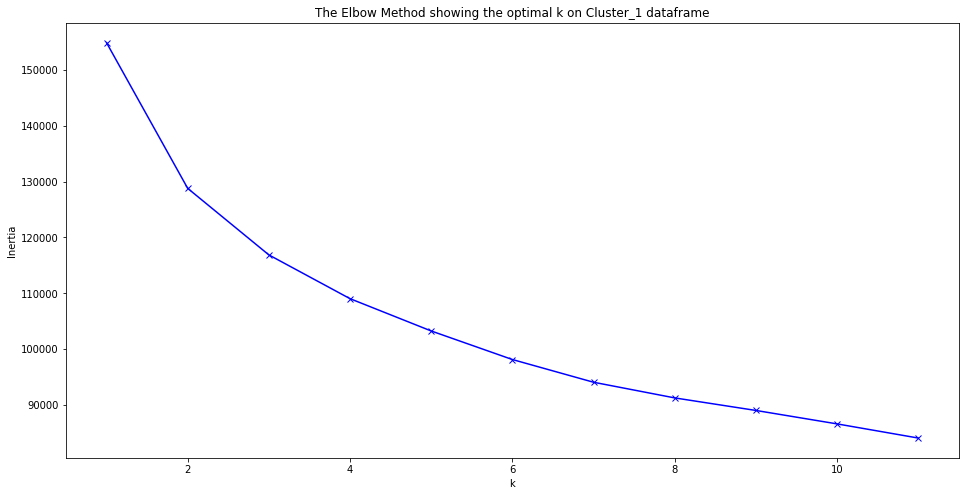

[154890.0000000004, 128794.34114181495, 116874.0614026932, 109032.92650177423, 103247.19248165947, 98131.4241750692, 94062.55174304266, 91256.17858880573, 89009.4382319789, 86601.5232138018, 84066.64311497516]


In [66]:
# elbow method

distortions = []
K = range(1,12)
for i in K:
    kmeanModel = KMeans(n_clusters= i, max_iter = 100)
    kmeanModel.fit(cluster_1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k on Cluster_1 dataframe')
plt.show()
print(distortions)

In [67]:
for i in range(2,11):
  cek_label = KMeans(n_clusters=i, init='k-means++').fit(cluster_1).labels_
  print(f'silhouete score for k (clusters) {i} = '+ str(silhouette_score(cluster_1, cek_label, metric='euclidean')))

silhouete score for k (clusters) 2 = 0.15900454729397623
silhouete score for k (clusters) 3 = 0.1527783178426895
silhouete score for k (clusters) 4 = 0.1343789612294596
silhouete score for k (clusters) 5 = 0.14630739786162733
silhouete score for k (clusters) 6 = 0.16179912002575952
silhouete score for k (clusters) 7 = 0.15239644806405864
silhouete score for k (clusters) 8 = 0.15367999320317333
silhouete score for k (clusters) 9 = 0.13414700147860656
silhouete score for k (clusters) 10 = 0.14318652204276766


there's 2 clusters, If we scale all features according to the highest silhouete score

### Define Customer Cluster for Not Churn Customer Dataframe Which All Features is Scaled

In [68]:
# model Kmeans for culster_1 dataframe with 10 clusters

cluster_model_1 = KMeans(n_clusters=2)
cluster_model_1.fit(cluster_1)

cluster_label_1 = cluster_model_1.labels_


In [69]:
customer_segmentation = no_churn.copy()

In [70]:
customer_segmentation['cluster'] = cluster_label_1
customer_segmentation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,reguler customer,1
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,prospect customer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,loyal customer,1
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer,1


DEFINE CLUSTERS

In [71]:
customer_segmentation.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer,1


In [72]:
print(customer_segmentation.groupby(['cluster','Churn'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','gender'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','SeniorCitizen'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','Partner'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','Dependents'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','customer_types'])['customerID'].size())

cluster  Churn
0        No       2320
1        No       2843
Name: customerID, dtype: int64

cluster  Churn  gender
0        No     Female    1149
                Male      1171
1        No     Female    1395
                Male      1448
Name: customerID, dtype: int64

cluster  Churn  SeniorCitizen
0        No     0                1896
                1                 424
1        No     0                2601
                1                 242
Name: customerID, dtype: int64

cluster  Churn  Partner
0        No     No          768
                Yes        1552
1        No     No         1671
                Yes        1172
Name: customerID, dtype: int64

cluster  Churn  Dependents
0        No     No            1489
                Yes            831
1        No     No            1901
                Yes            942
Name: customerID, dtype: int64

cluster  Churn  customer_types   
0        No     loyal customer       2241
                new customer            1
             

In [73]:
print(customer_segmentation.groupby(['cluster','Churn','PhoneService'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','InternetService'])['customerID'].size())
print("")


print(customer_segmentation.groupby(['cluster','Churn','MultipleLines'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','OnlineSecurity'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','OnlineBackup'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','DeviceProtection'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','TechSupport'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','StreamingTV'])['customerID'].size())
print("")

print(customer_segmentation.groupby(['cluster','Churn','StreamingMovies'])['customerID'].size())
print("")


cluster  Churn  PhoneService
0        No     No               246
                Yes             2074
1        No     No               264
                Yes             2579
Name: customerID, dtype: int64

cluster  Churn  InternetService
0        No     DSL                1050
                Fiber optic        1270
1        No     DSL                 907
                Fiber optic         529
                No                 1407
Name: customerID, dtype: int64

cluster  Churn  MultipleLines
0        No     No                888
                Yes              1432
1        No     No               2158
                Yes               685
Name: customerID, dtype: int64

cluster  Churn  OnlineSecurity
0        No     No                1008
                Yes               1312
1        No     No                2435
                Yes                408
Name: customerID, dtype: int64

cluster  Churn  OnlineBackup
0        No     No               801
                Yes         

In [157]:
print(customer_segmentation.groupby(['cluster','Churn','InternetService'])['customerID'].size())
print('')

cluster  Churn  InternetService
0        No     DSL                1050
                Fiber optic        1270
1        No     DSL                 907
                Fiber optic         529
                No                 1407
Name: customerID, dtype: int64



In [74]:
print(customer_segmentation.groupby(['cluster','Churn','Contract'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','PaperlessBilling'])['customerID'].size())
print('')

print(customer_segmentation.groupby(['cluster','Churn','PaymentMethod'])['customerID'].size())

cluster  Churn  Contract      
0        No     Month-to-month     571
                One year           782
                Two year           967
1        No     Month-to-month    1649
                One year           524
                Two year           670
Name: customerID, dtype: int64

cluster  Churn  PaperlessBilling
0        No     No                   793
                Yes                 1527
1        No     No                  1602
                Yes                 1241
Name: customerID, dtype: int64

cluster  Churn  PaymentMethod            
0        No     Bank transfer (automatic)     755
                Credit card (automatic)       740
                Electronic check              622
                Mailed check                  203
1        No     Bank transfer (automatic)     529
                Credit card (automatic)       549
                Electronic check              672
                Mailed check                 1093
Name: customerID, dtype: int64


In [156]:
customer_segmentation.groupby(['cluster','Churn'])['MonthlyCharges'].agg(['count','mean','min','max','sum'])

,,count,mean,min,max,sum
cluster,Churn,,,,,
0,No,2320,85.610948,29.80,118.75,198617.40
1,No,2843,41.474763,18.25,107.95,117912.75


In [155]:
customer_segmentation.groupby(['cluster','Churn'])['TotalCharges'].agg(['count','mean','min','max','sum'])

,,count,mean,min,max,sum
cluster,Churn,,,,,
0,No,2320,4680.956121,318.6,8672.45,10859818.2
1,No,2843,820.761027,18.8,5060.85,2333423.6


In [77]:
print(customer_segmentation.groupby(['cluster','Churn','customer_types'])['customerID'].size())

cluster  Churn  customer_types   
0        No     loyal customer       2241
                new customer            1
                prospect customer      11
                reguler customer       67
1        No     loyal customer       1054
                new customer          615
                prospect customer     511
                reguler customer      663
Name: customerID, dtype: int64


**DEFINE CLUSTERS**

CLUSTER 0  gold ( rich loyal customer )

CLUSTER 1 silver ( 

In [78]:
customer_segmentation.to_csv('no_churn_clustering.csv', index=False)

## Prepare only Churn Dataset

In [79]:
df_churn = churn.copy()

###One Hot Encoding

In [80]:
# onhot encoding all columns to cluster

dum_internet_churn = pd.get_dummies(churn, columns=["InternetService"], prefix=["InternetService"])
dum_internet_churn

churn = churn.merge(dum_internet_churn)
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer,1,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer,0,1,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,prospect customer,0,1,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,loyal customer,0,1,0
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,loyal customer,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,prospect customer,1,0,0
1865,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,prospect customer,1,0,0
1866,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,new customer,0,1,0
1867,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,loyal customer,0,1,0


In [81]:
dum_contract_churn = pd.get_dummies(churn, columns=["Contract"], prefix=["Contract"])
dum_contract_churn

churn = churn.merge(dum_contract_churn)
churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer,1,0,0,1,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer,0,1,0,1,0,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,prospect customer,0,1,0,1,0,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,loyal customer,0,1,0,1,0,0
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,loyal customer,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,prospect customer,1,0,0,0,1,0
1865,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,prospect customer,1,0,0,1,0,0
1866,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,new customer,0,1,0,1,0,0
1867,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,loyal customer,0,1,0,1,0,0


In [82]:
dum_payment_churn = pd.get_dummies(churn, columns=["PaymentMethod"], prefix=["PaymentMethod"])
dum_payment_churn

churn = churn.merge(dum_payment_churn)
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer,1,0,0,1,0,0,0,0,0,1
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer,0,1,0,1,0,0,0,0,1,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,prospect customer,0,1,0,1,0,0,0,0,1,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,loyal customer,0,1,0,1,0,0,0,0,1,0
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,loyal customer,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,prospect customer,1,0,0,0,1,0,0,0,1,0
1865,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,prospect customer,1,0,0,1,0,0,1,0,0,0
1866,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,new customer,0,1,0,1,0,0,0,0,1,0
1867,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,loyal customer,0,1,0,1,0,0,0,1,0,0


In [83]:
dum_customer_churn = pd.get_dummies(churn, columns=["customer_types"], prefix=["customer_types"])
dum_customer_churn

churn = churn.merge(dum_customer_churn)
churn 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_types_loyal customer,customer_types_new customer,customer_types_prospect customer,customer_types_reguler customer
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,prospect customer,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,loyal customer,0,1,0,1,0,0,0,0,1,0,1,0,0,0
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,loyal customer,0,1,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,prospect customer,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1865,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,prospect customer,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1866,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,new customer,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1867,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,loyal customer,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [84]:
churn = churn.drop(columns=['customerID','InternetService','Contract','PaymentMethod','customer_types'])
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_types_loyal customer,customer_types_new customer,customer_types_prospect customer,customer_types_reguler customer
0,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,Female,0,No,No,8,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.65,820.50,Yes,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,Female,0,Yes,No,28,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,Yes,0,1,0,1,0,0,0,0,1,0,1,0,0,0
4,Male,0,No,No,49,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.70,5036.30,Yes,0,1,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Male,0,No,No,12,Yes,No,No,No,No,Yes,Yes,No,Yes,59.80,727.80,Yes,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1865,Female,0,No,No,9,Yes,No,No,No,No,No,No,No,Yes,44.20,403.35,Yes,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1866,Male,1,No,No,1,Yes,Yes,No,No,No,No,No,No,Yes,75.75,75.75,Yes,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1867,Female,0,No,No,67,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,102.95,6886.25,Yes,0,1,0,1,0,0,0,1,0,0,1,0,0,0


### Label Encoding

In [85]:
#Label Encoding object menjadi numeric - TRAIN

col_cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']

le = LabelEncoder()
for i in col_cat:
    churn[i] = le.fit_transform(churn[i].astype(str))

churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_types_loyal customer,customer_types_new customer,customer_types_prospect customer,customer_types_reguler customer
0,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


### Scaling All Features

In [86]:
churn_1 = churn.copy()

In [87]:
scaler = StandardScaler()

churn_1 = scaler.fit_transform(churn_1)
print(churn_1)
print('')
print(churn_1.shape)

[[ 1.00482706 -0.58455842 -0.74665923 ...  1.22967344 -0.43117712
  -0.43204938]
 [-0.99519613 -0.58455842 -0.74665923 ...  1.22967344 -0.43117712
  -0.43204938]
 [-0.99519613 -0.58455842 -0.74665923 ... -0.81322404  2.31923254
  -0.43204938]
 ...
 [ 1.00482706  1.71069301 -0.74665923 ...  1.22967344 -0.43117712
  -0.43204938]
 [-0.99519613 -0.58455842 -0.74665923 ... -0.81322404 -0.43117712
  -0.43204938]
 [ 1.00482706  1.71069301  1.33929906 ...  1.22967344 -0.43117712
  -0.43204938]]

(1869, 31)


### Elbow Method & Silhouete Score for data with all Scaled Features

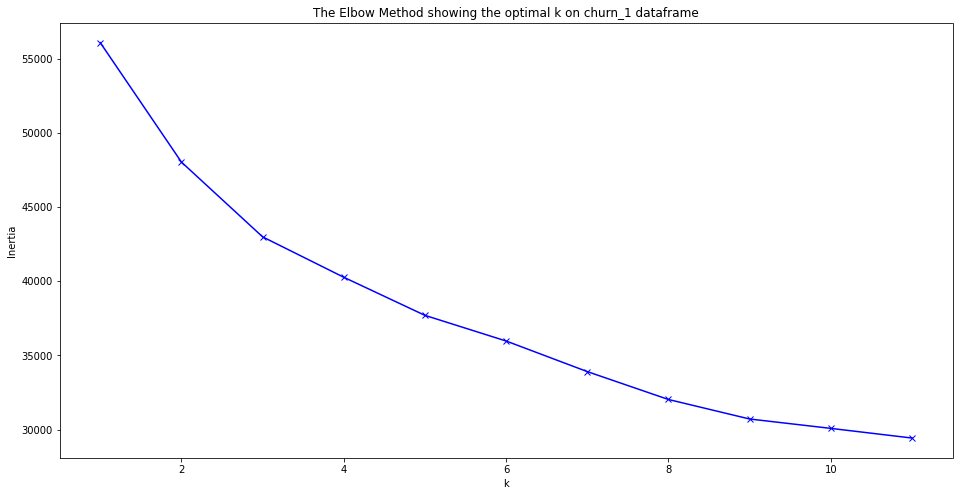

[56069.999999999985, 48025.52494125609, 42988.73483443109, 40265.780765597076, 37699.551307098416, 35971.00906649709, 33910.34790650668, 32031.87635980796, 30716.770391919505, 30084.871597645775, 29434.354127812112]


In [88]:
# elbow method

distortions = []
K = range(1,12)
for i in K:
    kmeanModel = KMeans(n_clusters= i, max_iter = 100)
    kmeanModel.fit(churn_1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k on churn_1 dataframe')
plt.show()
print(distortions)

In [89]:
for i in range(2,11):
  cek_label = KMeans(n_clusters=i, init='k-means++').fit(churn_1).labels_
  print(f'silhouete score for k (clusters) {i} = '+ str(silhouette_score(churn_1, cek_label, metric='euclidean')))

silhouete score for k (clusters) 2 = 0.17624322374695406
silhouete score for k (clusters) 3 = 0.14271496719144036
silhouete score for k (clusters) 4 = 0.12743009458740884
silhouete score for k (clusters) 5 = 0.14816092894594415
silhouete score for k (clusters) 6 = 0.14495520433953912
silhouete score for k (clusters) 7 = 0.15819521977408288
silhouete score for k (clusters) 8 = 0.16289634702202313
silhouete score for k (clusters) 9 = 0.1723763201180723
silhouete score for k (clusters) 10 = 0.16688727695957986


there's 2 clusters based on the highest score of silhouete score on Data with all Features is scaled

### Define Customer Cluster for Churn Dataset which have 2 clusters

In [90]:
# model Kmeans for culster_1 dataframe with 10 clusters

churn_model_1 = KMeans(n_clusters=2)
churn_model_1.fit(churn_1)

churn_model_1 = churn_model_1.labels_


In [91]:
churn_segmentation = df_churn.copy()

In [92]:
churn_segmentation['cluster'] = churn_model_1
churn_segmentation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types,cluster
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,prospect customer,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,loyal customer,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,loyal customer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,prospect customer,0
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,prospect customer,0
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,new customer,0
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,loyal customer,1


In [93]:
print(churn_segmentation.groupby(['cluster','Churn'])['customerID'].size())
print('')

print(churn_segmentation.groupby(['cluster','Churn','gender'])['customerID'].size())
print('')

print(churn_segmentation.groupby(['cluster','Churn','SeniorCitizen'])['customerID'].size())
print('')

print(churn_segmentation.groupby(['cluster','Churn','Partner'])['customerID'].size())
print('')

print(churn_segmentation.groupby(['cluster','Churn','Dependents'])['customerID'].size())

cluster  Churn
0        Yes      1333
1        Yes       536
Name: customerID, dtype: int64

cluster  Churn  gender
0        Yes    Female    682
                Male      651
1        Yes    Female    257
                Male      279
Name: customerID, dtype: int64

cluster  Churn  SeniorCitizen
0        Yes    0                1031
                1                 302
1        Yes    0                 362
                1                 174
Name: customerID, dtype: int64

cluster  Churn  Partner
0        Yes    No         984
                Yes        349
1        Yes    No         216
                Yes        320
Name: customerID, dtype: int64

cluster  Churn  Dependents
0        Yes    No            1135
                Yes            198
1        Yes    No             408
                Yes            128
Name: customerID, dtype: int64


In [94]:
print(churn_segmentation.groupby(['cluster','Churn','PhoneService'])['customerID'].size())
print("")


print(customer_segmentation.groupby(['cluster','Churn','InternetService'])['customerID'].size())
print("")


print(churn_segmentation.groupby(['cluster','Churn','MultipleLines'])['customerID'].size())
print("")

print(churn_segmentation.groupby(['cluster','Churn','OnlineSecurity'])['customerID'].size())
print("")

print(churn_segmentation.groupby(['cluster','Churn','OnlineBackup'])['customerID'].size())
print("")

print(churn_segmentation.groupby(['cluster','Churn','DeviceProtection'])['customerID'].size())
print("")

print(churn_segmentation.groupby(['cluster','Churn','TechSupport'])['customerID'].size())
print("")

print(churn_segmentation.groupby(['cluster','Churn','StreamingTV'])['customerID'].size())
print("")

print(churn_segmentation.groupby(['cluster','Churn','StreamingMovies'])['customerID'].size())

cluster  Churn  PhoneService
0        Yes    No               141
                Yes             1192
1        Yes    No                29
                Yes              507
Name: customerID, dtype: int64

cluster  Churn  InternetService
0        No     DSL                1050
                Fiber optic        1270
1        No     DSL                 907
                Fiber optic         529
                No                 1407
Name: customerID, dtype: int64

cluster  Churn  MultipleLines
0        Yes    No               877
                Yes              456
1        Yes    No               142
                Yes              394
Name: customerID, dtype: int64

cluster  Churn  OnlineSecurity
0        Yes    No                1189
                Yes                144
1        Yes    No                 385
                Yes                151
Name: customerID, dtype: int64

cluster  Churn  OnlineBackup
0        Yes    No              1096
                Yes             

In [158]:
print(churn_segmentation.groupby(['cluster','Churn','InternetService'])['customerID'].size())
print('')

cluster  Churn  InternetService
0        Yes    DSL                381
                Fiber optic        848
                No                 104
1        Yes    DSL                 78
                Fiber optic        449
                No                   9
Name: customerID, dtype: int64



In [95]:
print(churn_segmentation.groupby(['cluster','Churn','Contract'])['customerID'].size())
print('')

print(churn_segmentation.groupby(['cluster','Churn','PaperlessBilling'])['customerID'].size())
print('')

print(churn_segmentation.groupby(['cluster','Churn','PaymentMethod'])['customerID'].size())

cluster  Churn  Contract      
0        Yes    Month-to-month    1315
                One year            18
1        Yes    Month-to-month     340
                One year           148
                Two year            48
Name: customerID, dtype: int64

cluster  Churn  PaperlessBilling
0        Yes    No                  360
                Yes                 973
1        Yes    No                  109
                Yes                 427
Name: customerID, dtype: int64

cluster  Churn  PaymentMethod            
0        Yes    Bank transfer (automatic)    142
                Credit card (automatic)      123
                Electronic check             790
                Mailed check                 278
1        Yes    Bank transfer (automatic)    116
                Credit card (automatic)      109
                Electronic check             281
                Mailed check                  30
Name: customerID, dtype: int64


In [160]:

churn_segmentation.groupby(['cluster','Churn'])['MonthlyCharges'].agg(['count','mean','min','max','sum'])

,,count,mean,min,max,sum
cluster,Churn,,,,,
0,Yes,1333,67.949325,18.85,112.95,90576.45
1,Yes,536,90.586567,19.35,118.35,48554.40


In [159]:
|churn_segmentation.groupby(['cluster','Churn'])['TotalCharges'].agg(['count','mean','min','max','sum'])

,,count,mean,min,max,sum
cluster,Churn,,,,,
0,Yes,1333,529.563128,18.85,2868.05,705907.65
1,Yes,536,4024.289646,443.90,8684.80,2157019.25


In [98]:
print(churn_segmentation.groupby(['cluster','Churn','customer_types'])['customerID'].size())

cluster  Churn  customer_types   
0        Yes    loyal customer        34
                new customer         743
                prospect customer    291
                reguler customer     265
1        Yes    loyal customer       504
                new customer           1
                prospect customer      2
                reguler customer      29
Name: customerID, dtype: int64


**DEFINE CLUSTERS**

CLUSTER 0 =

CLUSTER 1 = Gold (rich loyal customer)


In [99]:
churn_segmentation.to_csv('churn_clustering.csv', index=False)

# VII. Machine Learning

## VII.1 Prepare Dataset $ Data Preprocessing

In [100]:
df_encoder = df_clean.copy()

In [101]:
df_encoder.duplicated().sum()

0

In [102]:
df_encoder

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_types
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,new customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,loyal customer
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,new customer
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,loyal customer
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,new customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,reguler customer
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,loyal customer
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,prospect customer
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,new customer


### Mapping target

In [103]:
# Change the unique value
data_list = [df_encoder['Churn']]
for i, col in enumerate(data_list):
    data_list[i].replace({"Yes": 1 }, inplace=True)
    data_list[i].replace({"No": 0 }, inplace=True)

Mapping target which is churn column

### Split Dataset into Train and Test Dataset

In [104]:
X = df_encoder.drop(columns='Churn')
y = df_encoder['Churn']

Define features and target to modeling

In [105]:
# Split data into train, test and validation.

X_train, X_test, y_train, y_test  = train_test_split(X, y ,test_size = 0.3, stratify = y, random_state=42)
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Train data shape: {y_train.shape}")
print(f"Test data shape: {y_test.shape}")

Train data shape: (4922, 21)
Test data shape: (2110, 21)
Train data shape: (4922,)
Test data shape: (2110,)


In [106]:
data_list = [X_train, X_test]
data_name = ['training','testing']

# Drop customerId column.
for i, col in enumerate(data_list):
    data_list[i].drop('customerID', inplace=True, axis=1)
    data_list[i].drop('customer_types', inplace=True, axis=1)

delete column customerID and customer_types

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 4499 to 272
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4922 non-null   object 
 1   SeniorCitizen     4922 non-null   int64  
 2   Partner           4922 non-null   object 
 3   Dependents        4922 non-null   object 
 4   tenure            4922 non-null   int64  
 5   PhoneService      4922 non-null   object 
 6   MultipleLines     4922 non-null   object 
 7   InternetService   4922 non-null   object 
 8   OnlineSecurity    4922 non-null   object 
 9   OnlineBackup      4922 non-null   object 
 10  DeviceProtection  4922 non-null   object 
 11  TechSupport       4922 non-null   object 
 12  StreamingTV       4922 non-null   object 
 13  StreamingMovies   4922 non-null   object 
 14  Contract          4922 non-null   object 
 15  PaperlessBilling  4922 non-null   object 
 16  PaymentMethod     4922 non-null   object

### Handling Imbalance Dataset using SMOTENC

In [108]:
from imblearn.over_sampling import SMOTENC

#Implementing SMOTE


sm = SMOTENC(random_state=42, categorical_features=[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16])

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Because our data is imbalance, we try to balancing the data with SMOTENC

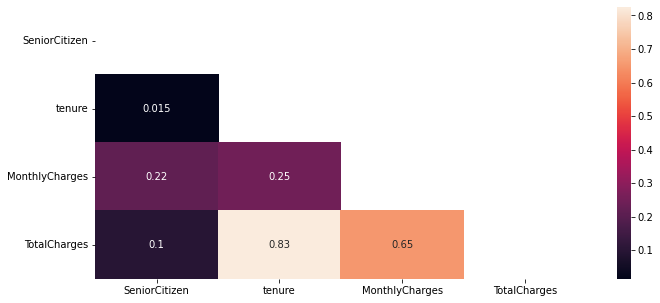

In [109]:
# Display correlation matrix
corr = X_train.corr()
mask = np.triu(corr)
plt.figure(figsize=(11,5))
sns.heatmap(data=corr, annot=True,mask= mask )
plt.show()

### MAKE PIPELINE

In [110]:
# Define pipeline for encoding

label_pipeline = Pipeline([
                           ('ordinal_encoder', OrdinalEncoder())
])

one_hot_pipeline = Pipeline([
                             ('one_hot_encoder', OneHotEncoder())
])

In [111]:
label_attribute = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling']

cat_attribute = ['InternetService','PaymentMethod']

numerical_attribute = ['tenure','MonthlyCharges','TotalCharges']


# Make Pipeline
tranformer = ColumnTransformer([
    ('label', label_pipeline, label_attribute),
    ('cat', one_hot_pipeline,cat_attribute)
])



We build pipline to simplyfy our model to deployment

## VII.2 Modeling

### Model Logistic Regression

#### Fit model use imbalance Data 

In [112]:
# Create pipeline function.
logreg_pipeline = Pipeline([
    ('column_transform', tranformer),
    ('std_scaler', StandardScaler()),
    ('logreg_regression', LogisticRegression())

])
    
logreg_pipeline.fit(X_train,y_train)


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('label',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling']),
               

In [113]:
y_pred_log = logreg_pipeline.predict(X_test)

predict the data test 

In [114]:
print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", logreg_pipeline.score(X_test,y_test))
print('')
print("Data train accuracy_score", logreg_pipeline.score(X_train, y_train))
print('')
print("f1_score", f1_score(y_test,y_pred_log))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_log))
print('')
print(classification_report(y_test, y_pred_log))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7834123222748816

Data train accuracy_score 0.7937830150345389

f1_score 0.5618408437200384

roc_auc_score 0.700133718608636

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.61      0.52      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



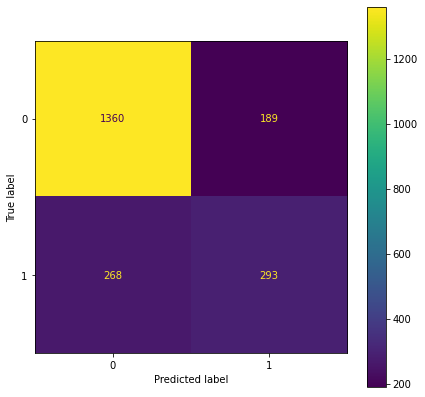

In [115]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
plt.grid(False)

#### Fit Model used balance data which allready used SMOTENC

In [116]:
logreg_pipeline.fit(X_train_res,y_train_res)
y_pred_log_bal = logreg_pipeline.predict(X_test)

print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", logreg_pipeline.score(X_test,y_test))
print('')
print("Data train accuracy_score", logreg_pipeline.score(X_train_res, y_train_res))
print('')
print("f1_score", f1_score(y_test,y_pred_log_bal))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_log_bal))
print('')
print(classification_report(y_test, y_pred_log_bal))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7341232227488151

Data train accuracy_score 0.801328168234643

f1_score 0.589010989010989

roc_auc_score 0.7285276338365618

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1549
           1       0.50      0.72      0.59       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.73      0.75      2110



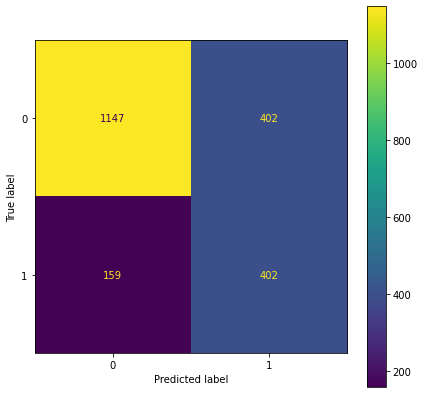

In [117]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_bal)
plt.grid(False)

### Model RandomForest

#### Fit model use imbalance Data

In [118]:
# Create pipeline function.
ranfor_pipeline = Pipeline([
    ('column_transform', tranformer),
    ('std_scaler', MinMaxScaler()),
    ('ranfor', RandomForestClassifier())

])
    
ranfor_pipeline.fit(X_train, y_train)


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('label',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling']),
               

In [119]:
y_pred_ranfor = ranfor_pipeline.predict(X_test)

In [120]:
print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", ranfor_pipeline.score(X_test,y_test))
print('')
print("Data train accuracy_score", ranfor_pipeline.score(X_train, y_train))
print('')
print("f1_score", f1_score(y_test,y_pred_ranfor))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_ranfor))
print('')
print(classification_report(y_test, y_pred_ranfor))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7454976303317535

Data train accuracy_score 0.9160910199106055

f1_score 0.49195837275307475

roc_auc_score 0.6555508757878408

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1549
           1       0.52      0.46      0.49       561

    accuracy                           0.75      2110
   macro avg       0.67      0.66      0.66      2110
weighted avg       0.74      0.75      0.74      2110



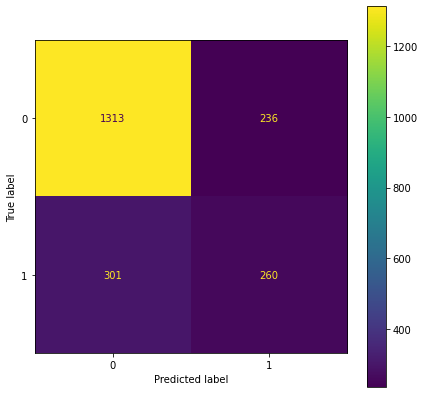

In [121]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ranfor)
plt.grid(False)

#### Fit model used balance data which allready used SMOTENC

In [122]:
ranfor_pipeline.fit(X_train_res,y_train_res)

y_pred_ranfor_bal = ranfor_pipeline.predict(X_test)

print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", ranfor_pipeline.score(X_test,y_test))
print('')
print("Data train accuracy_score", ranfor_pipeline.score(X_train_res, y_train_res))
print('')
print("f1_score", f1_score(y_test,y_pred_ranfor_bal))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_ranfor_bal))
print('')
print(classification_report(y_test, y_pred_ranfor_bal))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7398104265402844

Data train accuracy_score 0.9222468179302712

f1_score 0.5428809325562032

roc_auc_score 0.6891968713067714

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1549
           1       0.51      0.58      0.54       561

    accuracy                           0.74      2110
   macro avg       0.67      0.69      0.68      2110
weighted avg       0.75      0.74      0.74      2110



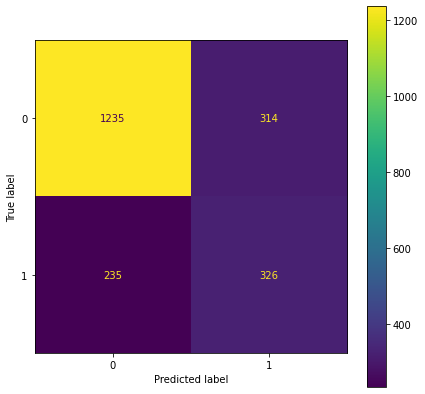

In [123]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ranfor_bal)
plt.grid(False)

### Model Decission Tree

#### Fit model use imbalance Data

In [124]:
# Create pipeline function.
dt_pipeline = Pipeline([
    ('column_transform', tranformer),
    ('std_scaler', MinMaxScaler()),
    ('decision_tree', DecisionTreeClassifier())

])
    
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('label',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling']),
               

In [125]:
y_pred_dt = dt_pipeline.predict(X_test)

In [126]:
print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", dt_pipeline.score(X_test,y_test))
print('')
print("Data train accuracy_score", dt_pipeline.score(X_train, y_train))
print('')
print("f1_score", f1_score(y_test,y_pred_dt))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_dt))
print('')
print(classification_report(y_test, y_pred_dt))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7161137440758294

Data train accuracy_score 0.9160910199106055

f1_score 0.46565566458519186

roc_auc_score 0.6361064409330842

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1549
           1       0.47      0.47      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



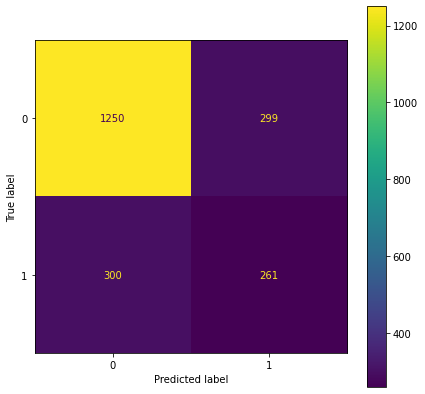

In [127]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.grid(False)

#### Fit model used balance data which allready used SMOTENC

In [128]:
dt_pipeline.fit(X_train_res,y_train_res)

y_pred_dt_bal = dt_pipeline.predict(X_test)

print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", dt_pipeline.score(X_test,y_test))
print('')
print("Data train accuracy_score", dt_pipeline.score(X_train_res, y_train_res))
print('')
print("f1_score", f1_score(y_test,y_pred_dt_bal))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_dt_bal))
print('')
print(classification_report(y_test, y_pred_dt_bal))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7123222748815166

Data train accuracy_score 0.9223851687880464

f1_score 0.5092966855295069

roc_auc_score 0.6642218716232312

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1549
           1       0.47      0.56      0.51       561

    accuracy                           0.71      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.71      0.72      2110



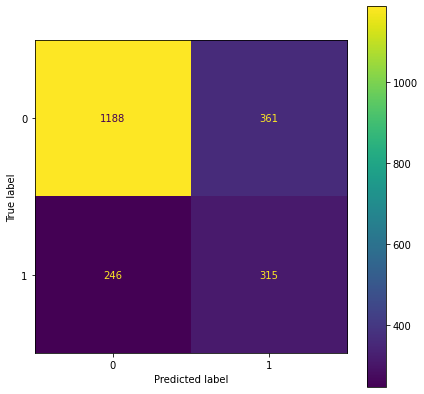

In [129]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_bal)
plt.grid(False)

## VII.3 Model Improvement with GrideSearch Cross Validation

#### GridSearch Logistic Regression

In [130]:
logreg_parameter = {
    'logreg_regression__solver' : ['newton-cg', 'liblinear', 'sag', 'saga'],
    'logreg_regression__penalty' : ['l1', 'l2', 'elasticnet' , 'none'],
    'logreg_regression__class_weight' : ['dict','balanced'],
    'logreg_regression__C' : [0.1,1,0.01,10,100],
    'logreg_regression__max_iter' : [50,100,500,1000,],
    'logreg_regression__multi_class' : ['auto','ovr','multinomial'],
}

logreg_grid = GridSearchCV(logreg_pipeline, param_grid = logreg_parameter,cv= 5, verbose=1)

In [131]:
logreg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transform',
                                        ColumnTransformer(transformers=[('label',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',

CREATE FINAL MODEL for LOGISTIC REGRESSION

In [132]:
best_grid_logreg = logreg_grid.best_estimator_

In [133]:
y_pred_grid_log = best_grid_logreg.predict(X_test)

In [134]:
print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", best_grid_logreg.score(X_test,y_test))
print('')
print("Data train accuracy_score", best_grid_logreg.score(X_train, y_train))
print('')
print("f1_score", f1_score(y_test,y_pred_grid_log))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_grid_log))
print('')
print(classification_report(y_test, y_pred_grid_log))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7834123222748816

Data train accuracy_score 0.7933766761479073

f1_score 0.5609990393852065

roc_auc_score 0.69956524190755

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1549
           1       0.61      0.52      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



#### fit with balance data( X_train_res, y_train_res)

In [135]:
best_grid_logreg.fit(X_train_res, y_train_res)

y_pred_grid_log_bal = best_grid_logreg.predict(X_test)

print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", best_grid_logreg.score(X_test,y_test))
print('')
print("Data train accuracy_score", best_grid_logreg.score(X_train_res, y_train_res))
print('')
print("f1_score", f1_score(y_test,y_pred_grid_log_bal))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_grid_log_bal))
print('')
print(classification_report(y_test, y_pred_grid_log_bal))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7345971563981043

Data train accuracy_score 0.801328168234643

f1_score 0.5894428152492668

roc_auc_score 0.7288504227326238

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1549
           1       0.50      0.72      0.59       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.73      0.75      2110



#### GridSearch RandomForest

In [136]:
ranfor_parameter = {
    'ranfor__n_estimators' : [50,100,500,1000],
    'ranfor__criterion' : ['gini', 'entropy', 'log_loss'],
    'ranfor__max_depth' : [5,7,9,11,13,15],
    'ranfor__max_features' : ['sqet','log2'],
    'ranfor__class_weight' : ['balanced','balanced_subsample'],

}

ranfor_grid = GridSearchCV(ranfor_pipeline, param_grid = ranfor_parameter, cv= 5, verbose=1)

In [137]:
ranfor_grid.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transform',
                                        ColumnTransformer(transformers=[('label',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',

#### CREATE FINAL MODEL for RANDOM FOREST

In [138]:
best_grid_ranfor = ranfor_grid.best_estimator_

In [139]:
y_pred_grid_ranfor = best_grid_ranfor.predict(X_test)

In [140]:
print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", best_grid_ranfor.score(X_test,y_test))
print('')
print("Data train accuracy_score", best_grid_ranfor.score(X_train, y_train))
print('')
print("f1_score", f1_score(y_test,y_pred_grid_ranfor))
print('')
print("recall_score", recall_score(y_test,y_pred_grid_ranfor))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_grid_ranfor))
print('')
print(classification_report(y_test, y_pred_grid_ranfor))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7450236966824645

Data train accuracy_score 0.8679398618447786

f1_score 0.5822981366459627

recall_score 0.6684491978609626

roc_auc_score 0.7206029075166659

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1549
           1       0.52      0.67      0.58       561

    accuracy                           0.75      2110
   macro avg       0.69      0.72      0.70      2110
weighted avg       0.77      0.75      0.75      2110



In [177]:
best_grid_ranfor.fit(X_train_res, y_train_res)

y_pred_grid_ranfor_bal = best_grid_ranfor.predict(X_test)

print("Evaluation Random Forest Manual Hyperparameter")
print('================================================')
print("accuracy_score:", best_grid_ranfor.score(X_test,y_test))
print('')
print("Data train accuracy_score", best_grid_ranfor.score(X_train_res, y_train_res))
print('')
print("f1_score", f1_score(y_test,y_pred_grid_ranfor_bal))
print('')
print("roc_auc_score", roc_auc_score(y_test,y_pred_grid_ranfor_bal))
print('')
print(classification_report(y_test, y_pred_grid_ranfor_bal))

Evaluation Random Forest Manual Hyperparameter
accuracy_score: 0.7374407582938388

Data train accuracy_score 0.8920863309352518

f1_score 0.5624012638230647

roc_auc_score 0.7046372278590407

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1549
           1       0.50      0.63      0.56       561

    accuracy                           0.74      2110
   macro avg       0.68      0.70      0.69      2110
weighted avg       0.76      0.74      0.75      2110



# SAVE MODEL TO DEPLOY


In [178]:
my_model = best_grid_logreg

In [179]:
joblib.dump(my_model, "model_grid.pkl")

['model_grid.pkl']

In [180]:
my_model_loaded = joblib.load("model_grid.pkl")

The best model for this dataset is using Logistic Regressuin, because the model is not under fir or overfit. The accuracy is 73% and accuracy macro average for precision and recall is 70%